# Import Numpy, yFinance, Pandas, Sk-Learn

In [13]:
import yfinance as yf
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Useful functions

In [36]:
def stock_data(ticker, start, end, interval):
    df= yf.Ticker(ticker)
    df = df.history(start=start, end=end, interval=interval)
    df.reset_index(level=0, inplace=True)
    return df
def rolling_average(df,columns, window):
    return df[columns].rolling(window).mean()

In [17]:
ticker = "PG"
start = "2013-06-01"
end = "2016-12-31"
interval = "1d"

pg = stock_data(ticker, start, end, interval)
pg.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-06-03,60.803748,61.460269,60.210502,61.428635,11720600,0.0,0
1,2013-06-04,61.468177,62.069334,60.708823,61.199242,11379300,0.0,0
2,2013-06-05,60.969870,61.072697,60.613918,60.637653,8826900,0.0,0
3,2013-06-06,60.558542,60.882853,59.981119,60.764202,11099900,0.0,0
4,2013-06-07,61.254622,61.919054,61.120148,61.499828,7839500,0.0,0


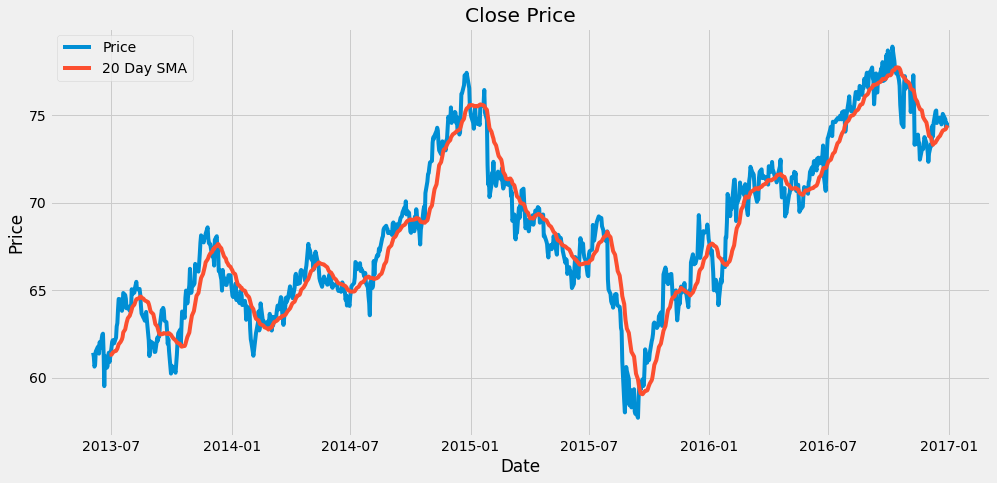

In [40]:
plt.figure(figsize = (15,7))

plt.plot(pg['Date'],pg['Close'],label = "Price")
plt.plot(pg['Date'],rolling_average(pg,'Close',20),label = "20 Day SMA")

plt.title("Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()